<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-05-14 06:24:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2021-05-14 06:24:57 (300 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

ninja-1.10.1         | 1.9 MB    | ##################################### | 100% 
libxml2-2.9.10       | 1.3 MB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testHTML.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testSAX.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testXPath.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_t

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/gtk-doc/html/libxml2/up.png.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/gtk-doc/html/libxml2/libxml2.devhelp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/gtk-doc/html/libxml2/libxml2-c14n.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/gtk-doc/html/libxml2/left.png.  Please remove this file manually (you may need to reb

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/info/recipe/0006-CVE-2020-7595.patch.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/info/recipe/0006-CVE-2020-24977.patch.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/info/recipe/test.xml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/info/recipe/0002-Make-and-install-a-pkg-config-file-on-Windows.patch.  Please remove this file manually (you may need

libstdcxx-ng-9.1.0   | 4.0 MB    | ##################################### | 100% 
jpeg-9b              | 247 KB    | ##################################### | 100% 
tensorboard-2.2.1    | 2.5 MB    | ##################################### | 100% 
icu-58.2             | 22.7 MB   | ######################6               |  61% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/icupkg.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/gencmn.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/gensprep.8.  Please remove this file manually (you may need to

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/icupkg.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/gencmn.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/gensprep.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/man/man8/genccode.8.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_t

idna-2.10            | 56 KB     | ##################################### | 100% 
olefile-0.46         | 48 KB     | ##################################### | 100% 
tqdm-4.50.2          | 55 KB     | ##################################### | 100% 
oauthlib-3.1.0       | 88 KB     | ##################################### | 100% 
pyodbc-4.0.30        | 72 KB     | ##################################### | 100% 
threadpoolctl-2.1.0  | 16 KB     | ##################################### | 100% 
joblib-0.17.0        | 205 KB    | ##################################### | 100% 
scipy-1.5.2          | 18.5 MB   | ##################################### | 100% 
sqlite-3.33.0        | 2.0 MB    | ##################################### | 100% 
libffi-3.3           | 54 KB     | ##################################### | 100% 
jedi-0.17.2          | 950 KB    | ##################################### | 100% 
sip-4.19.24          | 297 KB    | ##################################### | 100% 
kiwisolver-1.2.0     | 91 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d470-dg.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d430c-unix-s.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/dgkeys+8b.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d412+sr.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:un

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/m/modgraph.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/m/microterm.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/m/macterminal-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/m/mono-emx.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/e/ergo4000.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/e/ep4080.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/e/esprit.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/e/ecma+strikeout.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unl

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/abm85h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/abm85h-old.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/ansi.sysk.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att2350.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlin

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/c/cdc752.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/c/c108-w-8p.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/c/cons25r.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/c/cons50-koi8r-m.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:u

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/ln03.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/luna68k.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/linux-m2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/l/liswb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_ren

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d450.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d578.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d577-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d413-unix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rena

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nsterm-build309.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nsterm-acs.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/ncr160wy60pp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nec5520.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/ti926.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/t653x.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/tek4024.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/t/tvi920b-mc-2p.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse520-48pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy185-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy150-25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse160-25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcvt50w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcmw.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/printer.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/psterm-basic.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_

beautifulsoup4-4.9.3 | 87 KB     | ##################################### | 100% 
sympy-1.6.2          | 10.5 MB   | ##################################### | 100% 
pyzmq-19.0.2         | 499 KB    | ##################################### | 100% 
pytables-3.6.1       | 1.5 MB    | ##################################### | 100% 
rsa-4.6              | 26 KB     | ##################################### | 100% 
webencodings-0.5.1   | 19 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings/__pycache__/x_user_defined.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/webencodings-0.5.1-py37_1/lib/python3.7/site-packages/webencodings/__pycache__/tests.cpython-37.pyc.  Ple

astropy-4.0.2        | 7.6 MB    | ##################################### | 100% 
libtiff-4.1.0        | 607 KB    | ##################################### | 100% 
keras-preprocessing- | 36 KB     | ##################################### | 100% 
cryptography-3.1.1   | 625 KB    | ##################################### | 100% 
numpy-base-1.19.1    | 5.2 MB    | ##################################### | 100% 
dbus-1.13.18         | 586 KB    | ##################################### | 100% 
argon2-cffi-20.1.0   | 49 KB     | ##################################### | 100% 
libxcb-1.14          | 610 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/composite.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxc

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/composite.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xv.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/xc_misc.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/ge.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140

cloudpickle-1.6.0    | 29 KB     | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
pip-20.2.4           | 2.0 MB    | ##################################### | 100% 
entrypoints-0.3      | 12 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/__pycache__/entrypoints.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/entrypoints.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/py

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4cat.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4c.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/unlz4.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to

openssl-1.1.1h       | 3.8 MB    | ##################################### | 100% 
pytz-2020.1          | 239 KB    | ##################################### | 100% 
retrying-1.3.3       | 15 KB     | ##################################### | 100% 
h5py-2.10.0          | 1.2 MB    | ##################################### | 100% 
unixodbc-2.3.9       | 299 KB    | ##################################### | 100% 
pyjwt-1.7.1          | 32 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/WHEEL.  Please remove this file manually (you may need to reboot t

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/WHEEL.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/top_level.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyjwt-1.7.1-py37_0/lib/python3.7/site-packages/PyJWT-1.7.1.dist-info/METADATA.  

xlsxwriter-1.3.7     | 104 KB    | ##################################### | 100% 
markdown-3.3.2       | 123 KB    | ##################################### | 100% 
_pytorch_select-0.1  | 2 KB      | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 MB    | ##################################### | 100% 
boto3-1.16.0         | 70 KB     | ##################################### | 100% 
mock-4.0.2           | 31 KB     | ##################################### | 100% 
jmespath-0.10.0      | 22 KB     | ##################################### | 100% 
mkl-service-2.3.0    | 208 KB    | ##################################### | 100% 
keras-applications-1 | 30 KB     | ##################################### | 100% 
tensorflow-base-2.3. | 302.8 MB  | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
dask-core-2.30.0     | 639 KB    | ##################################### | 100% 
jupyterlab_server-1. | 24 KB

pexpect-4.8.0        | 79 KB     | ##################################### | 100% 
statsmodels-0.12.0   | 10.9 MB   | ##################################### | 100% 
zeromq-4.3.3         | 678 KB    | ##################################### | 100% 
expat-2.2.10         | 192 KB    | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
jupyterlab-2.2.6     | 5.9 MB    | ##################################### | 100% 
mkl_random-1.1.0     | 376 KB    | ##################################### | 100% 
pandocfilters-1.4.2  | 13 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/lib/python3.7/site-packages/__pycache__/pandocfilters.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140):

docutils-0.15.2      | 736 KB    | ##################################### | 100% 
mkl_fft-1.2.0        | 164 KB    | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
ibm-wsrt-py37main-ma | 2 KB      | ##################################### | 100% 
markupsafe-1.1.1     | 26 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/direct_url.json.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.

pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
typing_extensions-3. | 29 KB     | ##################################### | 100% 
glib-2.56.2          | 5.0 MB    | ##################################### | 100% 
yaml-0.2.5           | 87 KB     | ##################################### | 100% 
lcms2-2.11           | 419 KB    | ##################################### | 100% 
pywavelets-1.1.1     | 4.4 MB    | ##################################### | 100% 
intel-openmp-2020.2  | 947 KB    | ##################################### | 100% 
soupsieve-2.0.1      | 33 KB     | ##################################### | 100% 
tensorboard-plugin-w | 663 KB    | ##################################### | 100% 
zstd-1.4.4           | 1006 KB   | ##################################### | 100% 
six-1.15.0           | 13 KB     | ##################################### | 100% 
json5-0.9.5          | 22 KB     | ##################################### | 100% 
scikit-learn-0.23.2  | 6.9 M

fontconfig-2.13.0    | 291 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/xml/fontconfig/fonts.dtd.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/locale/zh_CN/LC_MESSAGES/fontconfig-conf.mo.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/locale/zh_CN/LC_MESSAGES/fontconfig.mo.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/xml/fontconfig/fonts.dtd.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/locale/zh_CN/LC_MESSAGES/fontconfig-conf.mo.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/locale/zh_CN/LC_MESSAGES/fontconfig.mo.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/share/fontconfig/conf.avail/65-fonts-persian.conf.  Please remove this file

fastcache-1.1.0      | 31 KB     | ##################################### | 100% 
libgfortran-ng-7.3.0 | 1.3 MB    | ##################################### | 100% 
grpcio-1.31.0        | 2.2 MB    | ##################################### | 100% 
ibm-wsrt-py37main-ke | 2 KB      | ##################################### | 100% 
jinja2-2.11.2        | 97 KB     | ##################################### | 100% 
libpq-12.2           | 2.8 MB    | ##################################### | 100% 
pillow-8.0.0         | 686 KB    | ##################################### | 100% 
networkx-2.5         | 1.2 MB    | ##################################### | 100% 
gst-plugins-base-1.1 | 6.3 MB    | ##################################### | 100% 
py-1.9.0             | 78 KB     | ##################################### | 100% 
pandas-1.1.3         | 10.5 MB   | ##################################### | 100% 
wheel-0.35.1         | 36 KB     | ##################################### | 100% 
pyshp-2.1.0          | 34 KB

tk-8.6.10            | 3.2 MB    | ##################################### | 100% 
tensorflow-estimator | 294 KB    | ##################################### | 100% 
tornado-6.0.4        | 649 KB    | ##################################### | 100% 
future-0.18.2        | 720 KB    | ##################################### | 100% 
dill-0.3.2           | 65 KB     | ##################################### | 100% 
sqlalchemy-1.3.19    | 1.8 MB    | ##################################### | 100% 
_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
jupyter_client-6.1.7 | 76 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client/ssh/__init__.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rena

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/INSTALLER.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/COPYING.md.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/WHEEL.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client-6.1.7.dist-info/REQUES

mkl-2019.4           | 204.1 MB  | ##################################### | 100% 

InvalidArchiveError('Error with archive /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')
InvalidArchiveError('Error with archive /opt/conda/pkgs/bleach-3.2.1-py_0.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')
InvalidArchiveError('Error with archive /opt/conda/pkgs/icu-58.2-he6710b0_3.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')
InvalidArchiveError('Error with archive /opt/conda/pkgs/ncurses-6.2-he6710b0_1.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')
InvalidArchiveError('Error with archive /opt/conda/pkgs/webencodings-0.5.1-py37_1.tar.b

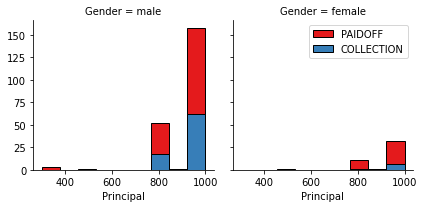

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

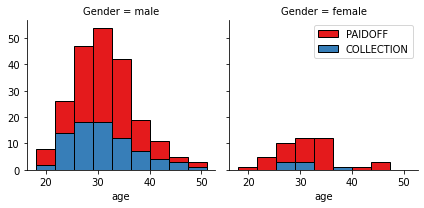

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


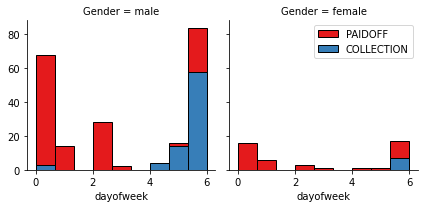

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

(array([[  3.,   2.,   0.,   0.,  81.,   2., 258.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  14., 148.,   0., 184.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  26., 108., 124.,  57.,  24.,   7.],
        [  0.,   0.,   0.,   0.,   0., 294.,   0.,   0.,  52.,   0.],
        [  0.,   0.,   0.,   0.,   0., 141.,   0., 205.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 302.,   0.,   0.,   0.,  44.],
        [  0.,   0.,   0.,   0.,   0., 195.,   0., 151.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 197.,   0., 149.,   0.,   0.]]),
 array([-5.89052444, -4.96882824, -4.04713204, -3.12543584, -2.20373963,
        -1.28204343, -0.36034723,  0.56134897,  1.48304517,  2.40474138,
         3.32643758]),
 <a list of 8 Lists of Patches objects>)

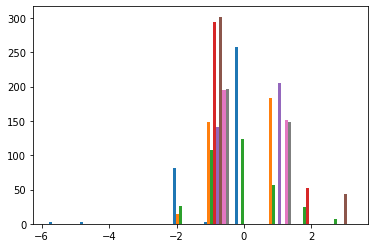

In [22]:
plt.hist(X)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [23]:
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.65714286, 0.58571429, 0.71428571, 0.68571429, 0.71428571,
       0.67142857, 0.72857143, 0.68571429, 0.75714286, 0.7       ,
       0.71428571])

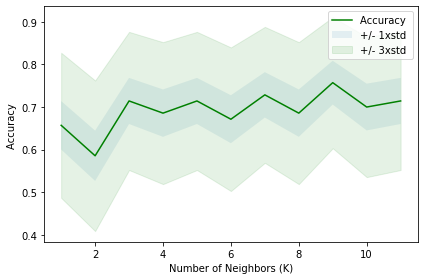

In [26]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7571428571428571 with k= 9


In [28]:
loanknn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)


In [29]:
yhat = loanknn.predict(X_test)
yhat[0:5]


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [30]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.37      0.42        19
     PAIDOFF       0.79      0.86      0.82        51

    accuracy                           0.73        70
   macro avg       0.64      0.62      0.62        70
weighted avg       0.71      0.73      0.71        70



In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7143504470607275

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label='PAIDOFF')


0.6984126984126984

# Decision Tree


In [33]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [34]:
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.5571428571428572


In [40]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [41]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

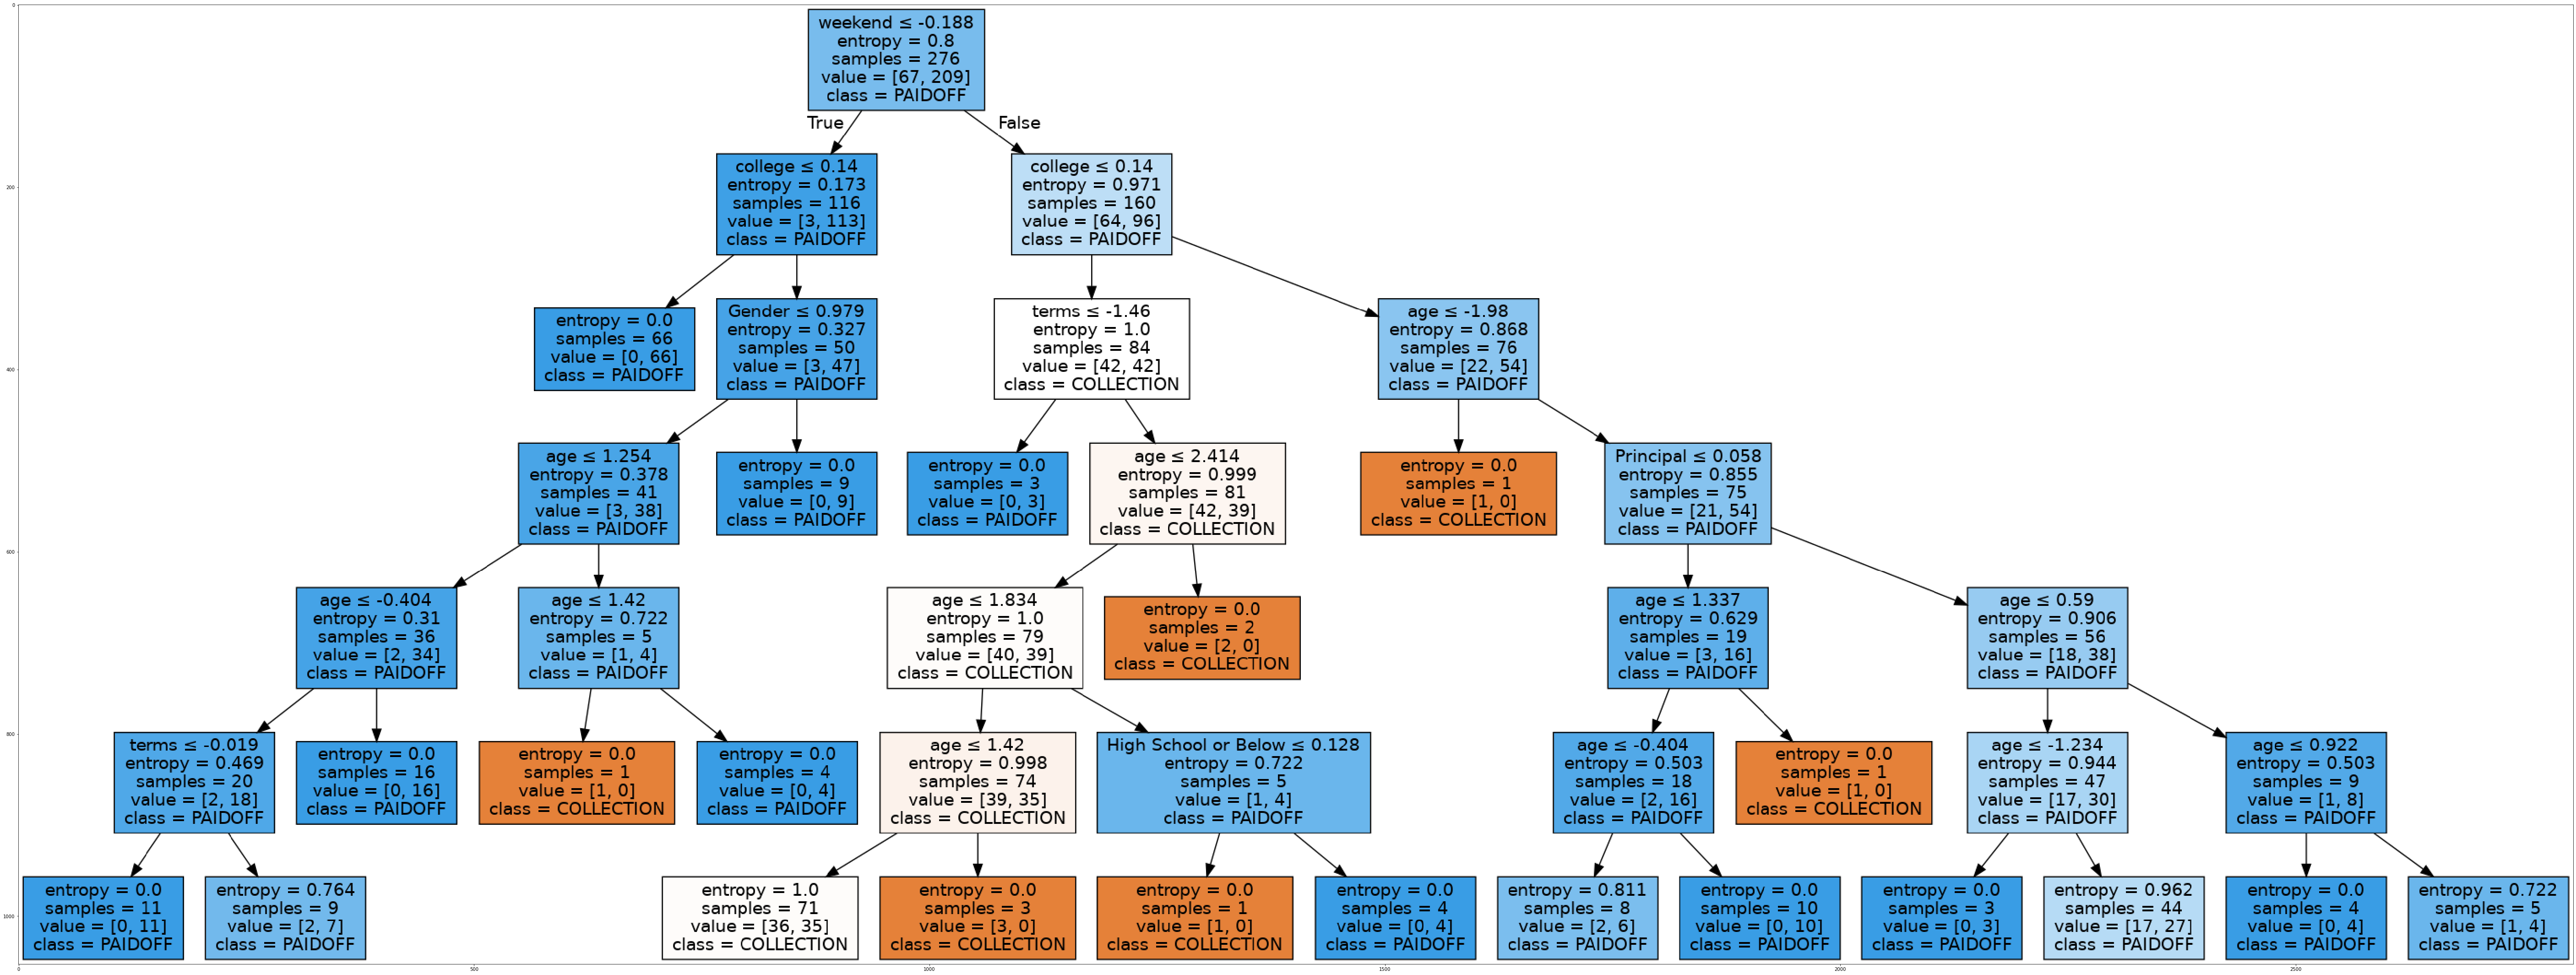

In [42]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = Feature.columns
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


# Support Vector Machine


In [43]:
from sklearn import svm

# Build a SVM Classifier with a Radial base Function Kernel
loansvm1 = svm.SVC(kernel='rbf').fit(X_train, y_train)
yhat1 = loansvm1.predict(X_test)
svm_r = metrics.accuracy_score(y_test, yhat1)

# Build a SVM Classifier with a Linear Kernel
loansvm2 = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat2 = loansvm2.predict(X_test)
svm_l = metrics.accuracy_score(y_test, yhat2)
    
# Build a SVM Classifier with a Polynomial Kernel
loansvm3 = svm.SVC(kernel='poly').fit(X_train, y_train)
yhat3 = loansvm3.predict(X_test)
svm_p = metrics.accuracy_score(y_test, yhat3)

# Build a SVM Classifier with a Sigmoid Kernel
loansvm4 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)
yhat4 = loansvm4.predict(X_test)
svm_s = metrics.accuracy_score(y_test, yhat4)
    
print(svm_r,svm_l,svm_p,svm_s)

0.6857142857142857 0.7285714285714285 0.6714285714285714 0.6571428571428571


In [44]:
loansvm = svm.SVC(kernel='rbf')
loansvm.fit(X_train, y_train)

SVC()

In [45]:
yhat_svm = loansvm.predict(X_test)
yhat_svm[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [46]:
print("Accuracy for SVM with rbf kernel: ", metrics.accuracy_score(y_test, yhat))


Accuracy for SVM with rbf kernel:  0.7285714285714285


In [47]:
f1_score(y_test, yhat_svm, average='weighted')


0.6731568098937688

In [48]:
jaccard_score(y_test, yhat_svm,pos_label='PAIDOFF')


0.65625

# Logistic Regression


In [49]:
from sklearn.linear_model import LogisticRegression

# Build and train the logestic regression model
loanlr1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat1 = loanlr1.predict(X_test)
loanlr_a1 = metrics.accuracy_score(y_test, yhat1)

# Build and train the logestic regression model
loanlr2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2 = loanlr2.predict(X_test)
loanlr_a2 = metrics.accuracy_score(y_test, yhat2)

# Build and train the logestic regression model
loanlr3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
yhat3 = loanlr3.predict(X_test)
loanlr_a3 = metrics.accuracy_score(y_test, yhat3)

# Build and train the logestic regression model
loanlr4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
yhat4 = loanlr4.predict(X_test)
loanlr_a4 = metrics.accuracy_score(y_test, yhat4)

# Build and train the logestic regression model
loanlr5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat5 = loanlr5.predict(X_test)
loanlr_a5 = metrics.accuracy_score(y_test, yhat5)


print('LR model with liblinear solver',loanlr_a1)
print('LR model with sag solver',loanlr_a2)
print('LR model with saga solver',loanlr_a3)
print('LR model with newton-cg solver',loanlr_a4)
print('LR model with lbfgs solver',loanlr_a5)


LR model with liblinear solver 0.6714285714285714
LR model with sag solver 0.7285714285714285
LR model with saga solver 0.7285714285714285
LR model with newton-cg solver 0.7285714285714285
LR model with lbfgs solver 0.7285714285714285


In [50]:

loanlr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = loanlr.predict(X_test)

In [51]:
f1_score(y_test, yhat_lr, average='weighted')


0.6542136990735122

In [52]:
jaccard_score(y_test, yhat_lr,pos_label='PAIDOFF')


0.6461538461538462

# Model Evaluation using Test set


In [53]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [54]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-05-14 07:17:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-05-14 07:17:52 (59.1 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [55]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [56]:
test_df.shape


(54, 10)

In [57]:
test_df['loan_status'].value_counts()


PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [58]:
df = test_df

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = Feature

y_test = df['loan_status'].values

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [59]:
# KNN model testing
yhat_knn = loanknn.predict(X_test)

# Calculate the f1 score
f1_knn = f1_score(y_test, yhat_knn, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_knn = jaccard_score(y_test, yhat_knn, pos_label='PAIDOFF')


print('f1 score: ',f1_knn)
print('Jaccard index: ',jsc_knn)

f1 score:  0.6719857206604195
Jaccard index:  0.66


In [60]:
# Predict using the Decision Tree model
yhat_dt= loanTree.predict(X_test)

# Calculate the f1 score
f1_dt = f1_score(y_test, yhat_dt, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_dt = jaccard_score(y_test, yhat_dt, pos_label='PAIDOFF')

print('f1 score: ',f1_dt)
print('Jaccard index: ',jsc_dt)

f1 score:  0.7858187134502925
Jaccard index:  0.7272727272727273


In [61]:
# Predict using the SVM model
yhat_test_svm = loansvm.predict(X_test)

# Calculate the f1 score
f1_svm = f1_score(y_test, yhat_test_svm, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_svm = jaccard_score(y_test, yhat_test_svm, pos_label='PAIDOFF')

print('f1 score: ',f1_svm)
print('Jaccard index: ',jsc_svm)

f1 score:  0.7960222378827031
Jaccard index:  0.7916666666666666


In [62]:
# Predict using the LR model
yhat_test_lr = loanlr.predict(X_test)

# Calculate the f1 score
f1_lr = f1_score(y_test, yhat_test_lr, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_lr = jaccard_score(y_test, yhat_test_lr, pos_label='PAIDOFF')

# Calculate Log loss
yhat_lr_prob = loanlr.predict_proba(X_test)
ll_lr = log_loss(y_test, yhat_lr_prob)


print('f1 score: ',f1_lr)
print('Jaccard index: ',jsc_lr)
print('Log Loss: ',ll_lr)

f1 score:  0.7736625514403292
Jaccard index:  0.8
Log Loss:  0.5636818287664448


In [63]:
Jaccard = [jsc_knn,jsc_dt,jsc_svm,jsc_lr]
F1_score = [f1_knn,f1_dt,f1_svm,f1_lr]
LogLoss = ['NA','NA','NA',ll_lr]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.660000,0.671986,NA
1,Decistion Tree,0.727273,0.785819,NA
2,SVM,0.791667,0.796022,NA
3,LogisticRegression,0.800000,0.773663,0.563682


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
